In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
df=pd.read_csv("/content/gld_price_data.csv")

In [ ]:
#first 5 rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#last 5 rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [ ]:
#sum of the null values in each attribute
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#statistical measures 
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation are of 2 types:
1. Positive correlation
2. Negative correlation

In [ ]:
correlation=df.corr()

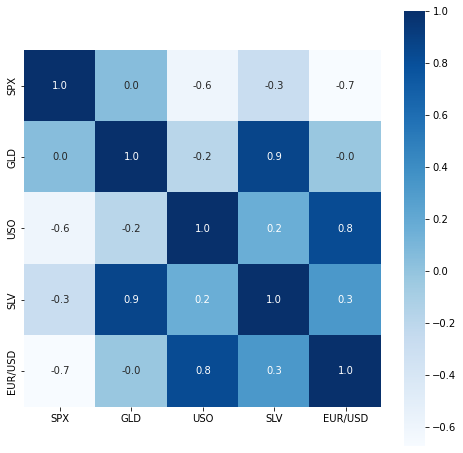

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Blues');

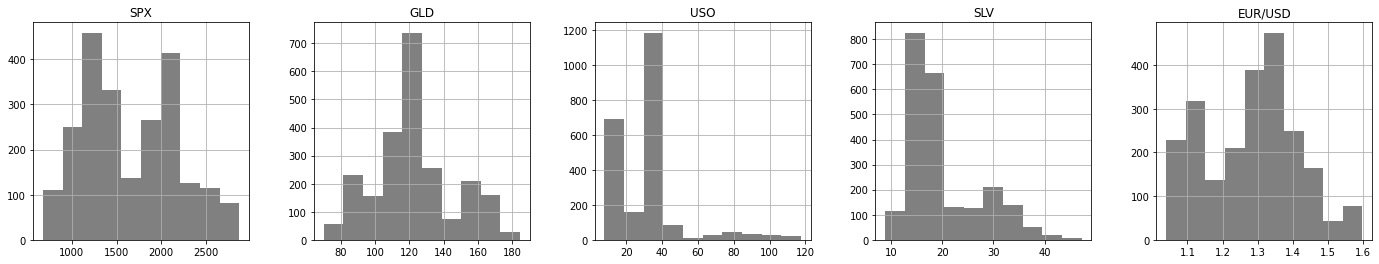

In [ ]:
df.hist(figsize=(24,4), layout=(1,5), color="grey");

In [ ]:
#correlation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


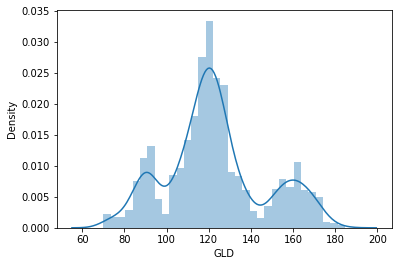

In [ ]:
#distribution of gold price
sns.distplot(df['GLD'])

In [ ]:
#Splitting the Features and Target
X=df.drop(['Date','GLD'],axis=1)#col-1, row-0
Y=df['GLD']

In [ ]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Splitting the data into Training and Testting(80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [ ]:
model=RandomForestRegressor(n_estimators=100)


In [ ]:
#Training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
#prediction on test data
prediction=model.predict(X_test)

In [ ]:
prediction

array([168.13459947,  82.03609959, 115.98470056, 127.74780079,
       120.73880148, 154.6510985 , 150.47199857, 126.1829004 ,
       117.64759883, 126.04700027, 116.854801  , 171.52300127,
       141.66669882, 167.15079761, 115.28869982, 117.81960028,
       138.72750274, 170.14820079, 159.5234021 , 159.94159993,
       155.10899986, 125.11810006, 175.89960004, 157.43950306,
       125.31360043,  93.85529983,  77.80210026, 120.80730041,
       119.11439964, 167.42659957,  88.10540067, 125.33600011,
        91.07460082, 117.73640029, 121.07349929, 135.73570043,
       115.53900098, 115.2358004 , 147.9972992 , 107.44710066,
       104.35150233,  87.36049805, 126.51040028, 118.06159961,
       151.13549869, 119.47550021, 108.4065003 , 108.4054983 ,
        93.20230049, 127.13499768,  74.7337    , 113.61859901,
       121.27340014, 111.25929937, 118.87799904, 120.91729938,
       159.08969965, 167.54550107, 147.02629649,  85.63639864,
        94.28270047,  86.86089909,  90.50110005, 118.99

In [ ]:
from sklearn import metrics

In [ ]:
#R Squarred error
error=metrics.r2_score(Y_test, prediction)
print("R squared error: ", error)

R squared error:  0.9889498000401793


In [ ]:
training_score=metrics.r2_score(Y_train,model.predict(X_train))
print("Training score : ",training_score)

Training score :  0.9985294523143365


In [ ]:
#Actual vs Predicted Values
Y_test=list(Y_test)

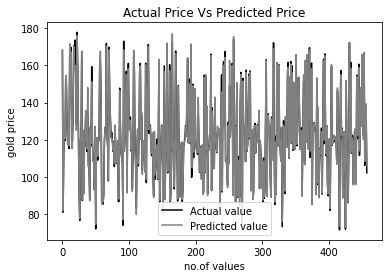

In [ ]:
plt.plot(Y_test, color='black', label='Actual value')
plt.plot(prediction, color='grey', label='Predicted value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('no.of values')
plt.ylabel('gold price')
plt.legend()
plt.show()

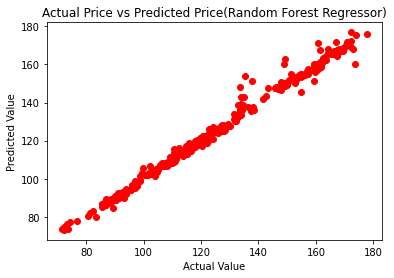

In [ ]:
pre=model.predict(X_test)
plt.scatter(Y_test,pre,color='red')
plt.title('Actual Price vs Predicted Price(Random Forest Regressor)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');